In [238]:
import numpy as np
import matplotlib.pyplot as plt

def fn_lieb_prod(lieb1, lieb2):
    # lieb1.fn_print()
    # lieb2.fn_print()
    lieb = TL(lieb1.M)   
    lieb.map = TL.fn_map_product(lieb1.map, lieb2.map)
    lieb.cn = lieb.map[0]
    
    return lieb

def fn_virsual(map,y):
    m = (len(map) - 1)//2     
    for k in range(1,m+1):
        plt.plot((k,k),(y-1.5,y+0.5),'y--')     
    v_finished = [0 for _ in range(2*m)]
    for k in range(1,2*m+1):
        if v_finished[k-1]==0:
            ind1 = k
            ind2 = map[k]
            if ind1<=m:
                p1_x = ind1
                p1_y = y
            else:
                p1_x = ind1 - m
                p1_y = y-1                
            if ind2<=m:
                p2_x = ind2
                p2_y = y
            else:
                p2_x = ind2 - m
                p2_y = y-1           
            v_finished[ind1-1] = 1
            v_finished[ind2-1] = 1
        if p1_y==(y-1) and p2_y==(y-1):
            TL.fn_plot2(p1_x,p1_y,p2_x,p2_y,np.abs(p1_x-p2_x)/m,True) 
        elif p1_y==y and p2_y==y:
            TL.fn_plot2(p1_x,p1_y,p2_x,p2_y,np.abs(p1_x-p2_x)/m,False)
        else:
            TL.fn_plot2(p1_x,p1_y,p2_x,p2_y,np.abs(p1_x-p2_x)/m,True)     
    # plt.show()
    

# ====================================================================================    
    
    
    
class TL:   
    # Initialization of the Temperley-Lieb Algebra
    def __init__(self,N):
        self.map = [0] + [N+1+i for i in range(N)] + [i+1 for i in range(N)]
        self.cn = 0
        self.M = N
        self.leg = []
        self.pipe = [[] for _ in range(N)]
        self.configuration = [[] for _ in range(N)]
        self.distribution = []
        self.distribution2 = []
        
    def fn_print(self):
        print(self.map[1:self.M+1])
        print(self.map[self.M+1:2*self.M+1])
        print('circle number = %d' %self.cn)
    
    @staticmethod
    def fn_map_product(map1, map2):
        m = (len(map1) - 1)//2
        new_map = [map1[0]+map2[0]] + map1[1:m+1] + map2[m+1:]
        
        fn_up = lambda x: map1[x+m] - m
        fn_down = lambda x: map2[x]
        v_finished = [0 for _ in range(m)]
        for k in range(1,m+1):      
            if v_finished[k-1]==0:     
                p = k
                v_finished[p-1] = 1
                while True:
                    p = fn_down(p)
                    if p>=m+1:
                        point1 = p
                        break
                    v_finished[p-1] = 1
                    
                    p = fn_up(p)
                    if p<=0:
                        point1 = p + m
                        break
                    if p==k:
                        new_map[0] = new_map[0] + 1
                        break
                    v_finished[p-1] = 1
                                  
                if p!=k:
                    p = k
                    while True:
                        p = fn_up(p)
                        if p<=0:
                            point2 = p + m
                            break
                        v_finished[p-1] = 1
                        
                        p = fn_down(p)
                        if p>=m+1:
                            point2 = p
                            break
                        v_finished[p-1] = 1
                        
                    new_map[point2] = point1
                    new_map[point1] = point2
                
        return new_map  
    
    
    def fn_add(self,p1,p2):
        point1 = p1 + self.M
        point2 = p2 + self.M
        if self.map[point1] == point2:
            self.map[0] = self.map[0] + 1
            self.cn = self.cn + 1
        else:
            modify_point_1 = self.map[point1]
            modify_point_2 = self.map[point2]
            self.map[modify_point_1] = modify_point_2
            self.map[modify_point_2] = modify_point_1
            self.map[point1] = point2
            self.map[point2] = point1
            
            
    def fn_generate_by_distribution(self):
        if not self.distribution:
            self.map = [0] + [N+1+i for i in range(N)] + [i+1 for i in range(N)]
            return
        
        for k in self.distribution:
            pipe = k[0]
            p1 = pipe + 1
            p2 =(pipe+1)%self.M + 1
            self.fn_add(p1,p2)
            
    def fn_generate_by_any(self,dis):
        if not dis:
            self.map = [0] + [N+1+i for i in range(N)] + [i+1 for i in range(N)]
            return
        
        self.distribution = dis
        take2 = lambda x: x[1]
        self.distribution.sort(key=take2)
        
        leg_ind = 1
        for x in self.distribution:
            pipe = x[0]
            y = x[1]
            if leg_ind>=len(self.leg):
                self.leg.append([x[0],x[1]])
            else:
                self.leg[leg_ind] = [x[0],x[1]]
            leg_ind = leg_ind + 1
            p1 = pipe + 1
            p2 =(pipe+1)%self.M + 1
            self.fn_add(p1,p2) 
    
    def fn_generate_by_distribution2(self):
        if not self.distribution2:
            self.map = [0] + [N+1+i for i in range(N)] + [i+1 for i in range(N)]
            return
        
        self.distribution = self.distribution2
        take2 = lambda x: x[1]
        self.distribution.sort(key=take2)
        
        for k in self.distribution:
            pipe = k[0]
            p1 = pipe + 1
            p2 =(pipe+1)%self.M + 1
            self.fn_add(p1,p2)
        
    
    def fn_update_pipe(self,pipe,beta):
        num_leg = np.random.poisson(beta)
        v_rand = [np.random.rand() for _ in range(num_leg)]
        
        dis = [[pipe,x] for x in v_rand]
        remain = [x for x in self.distribution2 if x[0]!=pipe]
        dis = dis + remain
        self.fn_generate_by_any(dis)
        
    
    def fn_generate_poisson(self,beta):
        num_leg = np.random.poisson(beta*self.M)
        v_rand = [np.random.rand()*self.M for _ in range(num_leg)]
        v_pipe = [int(v_rand[i]) for i in range(num_leg)]
        v_y = [v_rand[i] - int(v_rand[i]) for i in range(num_leg)]
        c_leg = []
        for k in range(num_leg):
            c_leg.append([v_pipe[k],v_y[k]])
        
        take1 = lambda x: x[0]
        take2 = lambda x: x[1]
        tv = sorted(c_leg,key=take2)
        
        self.distribution = [[v_pipe[k],v_y[k]] for k in range(num_leg)]
        self.distribution.sort(key=take2)
        
        self.distribution2 = [[v_pipe[k],v_y[k]] for k in range(num_leg)]
        self.distribution2.sort(key=take1)
        
        # =================================================
        v_delete = []
        for k in range(len(tv)-1):
            if tv[k]==tv[k+1]:
                v_delete.append(k+1)
                
        if not v_delete:
            v_delete.reverse()
            for k in v_delete:
                tv.pop(k)
        # ==================================================
                
        for k in range(len(tv)):
            
            pipe = tv[k][0]
            y = tv[k][1]
            self.pipe[pipe].append([k+1,y,-1,-1])
            self.configuration[pipe].append(y)
            
        for k in tv:
            pipe = k[0]
            p1 = pipe + 1
            p2 =(pipe+1)%self.M + 1
            self.fn_add(p1,p2)
            
        for k in range(len(tv)):
            if k>=len(self.leg):
                self.leg.append([tv[k][0],tv[k][1]])
            else:
                self.leg[k] = [tv[k][0],tv[k][1]]
                     
        
        return tv
        
        
            
    # ============  virsualization functions:  =====================
    def fn_virsualization(self):
        map = self.map
        m = (len(map) - 1)//2     
        for k in range(1,m+1):
            plt.plot((k,k),(-0.5,1.5),'y--')     
        v_finished = [0 for _ in range(2*m)]
        for k in range(1,2*m+1):
            if v_finished[k-1]==0:
                ind1 = k
                ind2 = map[k]
                if ind1<=m:
                    p1_x = ind1
                    p1_y = 1
                else:
                    p1_x = ind1 - m
                    p1_y = 0                
                if ind2<=m:
                    p2_x = ind2
                    p2_y = 1
                else:
                    p2_x = ind2 - m
                    p2_y = 0           
                v_finished[ind1-1] = 1
                v_finished[ind2-1] = 1
            if p1_y==0 and p2_y==0:
                self.fn_plot2(p1_x,p1_y,p2_x,p2_y,np.abs(p1_x-p2_x)/m,True) 
            elif p1_y==1 and p2_y==1:
                self.fn_plot2(p1_x,p1_y,p2_x,p2_y,np.abs(p1_x-p2_x)/m,False)
            else:
                self.fn_plot2(p1_x,p1_y,p2_x,p2_y,np.abs(p1_x-p2_x)/m,True)
        plt.show()
        
    def fn_virsualization_leg(self):
        map = self.map
        m = (len(map) - 1)//2     
        for k in range(1,m+1):
            plt.plot((k,k),(-0.5,1.5),'y--')  
        for k in range(len(self.leg)):
            pipe = self.leg[k][0]
            y = 1 - self.leg[k][1]
            if pipe<=self.M-2:
                plt.plot([pipe+1,pipe+2],[y,y],color='r',linewidth=0.2)
            else:
                plt.plot([pipe+1,pipe+1.5],[y,y],color='r',linewidth=0.2)
                plt.plot([0.5,1],[y,y],color='r',linewidth=0.2)
        
        plt.show()
        
    
                
    @staticmethod
    def fn_plot2(x1,y1,x2,y2,A,is_up):
        
        if y1!=y2:
            plt.plot((x1,x2),(y1,y2),color='r')     
        elif (is_up):
            vx = np.linspace(x1,x2,500)
            vy = y1 + 0.5*A*np.sin((vx-np.min([x1,x2]))/np.abs(x2-x1)*np.pi)
            plt.plot(vx,vy,color='r')
        else: 
            vx = np.linspace(x1,x2,500)
            vy = y1 - 0.5*A*np.sin((vx-np.min([x1,x2]))/np.abs(x2-x1)*np.pi)
            plt.plot(vx,vy,color='r')
            
        # plt.show()
               

[[1, 0.03729697329277393], [2, 0.09617252194775716], [7, 0.16726554211490008], [3, 0.21232305952165742], [1, 0.6052443356325217], [3, 0.6122298674253592], [5, 0.6993193706860312], [7, 0.7717220921054322], [7, 0.8305129365839914], [0, 0.8970188918814239]]


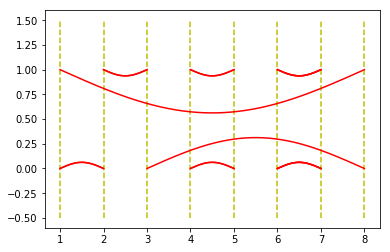

[[1, 0.03729697329277393], [2, 0.09617252194775716], [7, 0.16726554211490008], [3, 0.21232305952165742], [1, 0.6052443356325217], [3, 0.6122298674253592], [5, 0.6993193706860312], [7, 0.7717220921054322], [7, 0.8305129365839914], [0, 0.8970188918814239]]


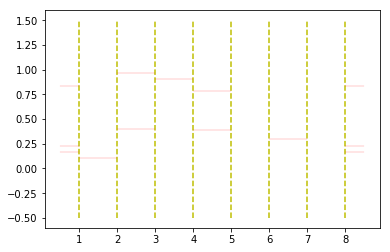

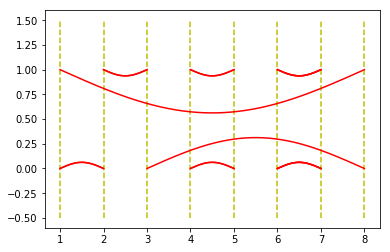

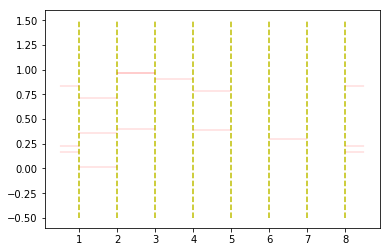

In [242]:
t1 = TL(8)
print(t1.fn_generate_poisson(2))
fn_virsual(t1.map,1)
plt.show()
print(t1.leg)
t1.fn_virsualization_leg()
t1.fn_update_pipe(0,2)
fn_virsual(t1.map,1)
plt.show()
t1.fn_virsualization_leg()


In [230]:
t1.configuration

[[0.1808943740327793, 0.8481511447891963],
 [0.6340985674559052, 0.7728498491532951, 0.8018586562102374],
 [0.20713132170909, 0.9137343945881398],
 [0.1540972810696708,
  0.16640399403702055,
  0.19646177851686364,
  0.9688528886086321],
 [0.715973535139355, 0.7793748483601428],
 [],
 [],
 [0.12527966183816996,
  0.2965100313676654,
  0.47519836971708607,
  0.9463160302450149]]

In [231]:
t1.distribution

[[7, 0.12527966183816996],
 [3, 0.1540972810696708],
 [3, 0.16640399403702055],
 [0, 0.1808943740327793],
 [3, 0.19646177851686364],
 [2, 0.20713132170909],
 [7, 0.2965100313676654],
 [7, 0.47519836971708607],
 [1, 0.6340985674559052],
 [4, 0.715973535139355],
 [1, 0.7728498491532951],
 [4, 0.7793748483601428],
 [1, 0.8018586562102374],
 [0, 0.8481511447891963],
 [2, 0.9137343945881398],
 [7, 0.9463160302450149],
 [3, 0.9688528886086321]]

In [232]:
t1.distribution2

[[0, 0.1808943740327793],
 [0, 0.8481511447891963],
 [1, 0.7728498491532951],
 [1, 0.8018586562102374],
 [1, 0.6340985674559052],
 [2, 0.20713132170909],
 [2, 0.9137343945881398],
 [3, 0.19646177851686364],
 [3, 0.9688528886086321],
 [3, 0.1540972810696708],
 [3, 0.16640399403702055],
 [4, 0.7793748483601428],
 [4, 0.715973535139355],
 [7, 0.12527966183816996],
 [7, 0.2965100313676654],
 [7, 0.47519836971708607],
 [7, 0.9463160302450149]]

In [153]:
tv = [[1,2],[3,1]]
take2 = lambda x: x[1]
sorted(tv,key=take2)

[[3, 1], [1, 2]]

In [150]:
tv

[[1, 2], [3, 1]]